<a href="https://colab.research.google.com/github/Sreelakshmi2023/MAIN/blob/main/CNN%2BLSTM_ATTENTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the Dependencies**

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Bidirectional, Attention, Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

**Loading the dataset**

In [2]:
# Load the dataset
# Assuming 'dataset.csv' is the name of your dataset file
dataset_path = 'Benign_malicious.csv'
df = pd.read_csv(dataset_path)

**Data Processing**

In [3]:
# Data preprocessing
max_words = 10000  # Maximum number of words to consider in the tokenizer
max_len = 100      # Maximum length of sequences

# Tokenization
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['url'])
sequences = tokenizer.texts_to_sequences(df['url'])

**Tokenization**

In [5]:
# Padding sequences
X = pad_sequences(sequences, maxlen=max_len)

# Encoding labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['type'])


**spliting the dataset**

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model Architecture**

In [7]:
# Model architecture
embedding_dim = 50  # Dimension of word embeddings
num_filters = 64    # Number of filters in the Conv1D layer
lstm_units = 64     # Number of units in the LSTM layer


**CNN _ LSTM WITH ATTENTION MECHANISM**

In [18]:
# Input layer
inputs = Input(shape=(max_len,))

# Embedding layer
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len)(inputs)

# Convolutional layer
conv1d_layer = Conv1D(filters=num_filters, kernel_size=3, activation='relu')(embedding_layer)

# Max pooling layer
pooling_layer = MaxPooling1D(pool_size=2)(conv1d_layer)

# LSTM layer
lstm_layer = Bidirectional(LSTM(units=lstm_units, return_sequences=True))(pooling_layer)

# Attention mechanism
attention_layer = Attention()([lstm_layer, lstm_layer])

# Flatten the output from the attention layer
flattened_output = Flatten()(attention_layer)

# Dense layer
outputs = Dense(1, activation='sigmoid')(flattened_output)

# Model compilation
model = Model(inputs=inputs, outputs=outputs)

**Model compile**

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 100)]                0         []                            
                                                                                                  
 embedding_3 (Embedding)     (None, 100, 50)              500000    ['input_4[0][0]']             
                                                                                                  
 conv1d_3 (Conv1D)           (None, 98, 64)               9664      ['embedding_3[0][0]']         
                                                                                                  
 max_pooling1d_3 (MaxPoolin  (None, 49, 64)               0         ['conv1d_3[0][0]']            
 g1D)                                                                                       

**Model Architecture**

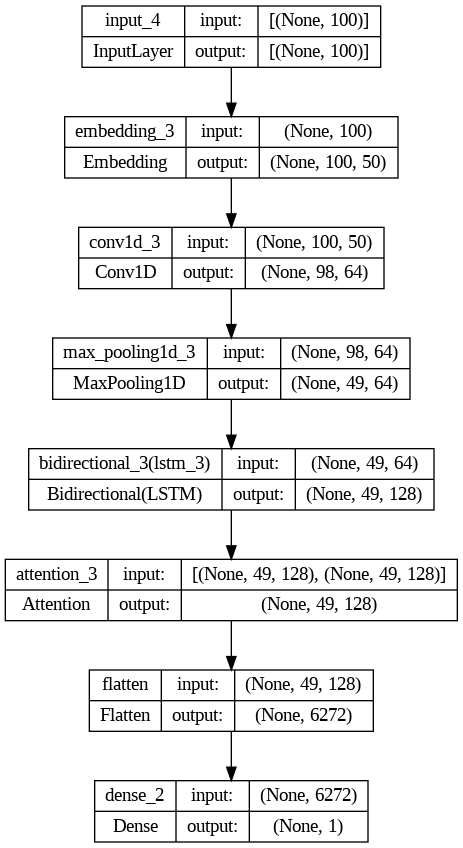

In [20]:
# Plot model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True)


**Model training**

In [21]:
# Model training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
227/227 [==============================] - 32s 111ms/step - loss: 0.2101 - accuracy: 0.9172 - val_loss: 0.0870 - val_accuracy: 0.9658
Epoch 2/20
227/227 [==============================] - 8s 36ms/step - loss: 0.0721 - accuracy: 0.9724 - val_loss: 0.0822 - val_accuracy: 0.9672
Epoch 3/20
227/227 [==============================] - 5s 23ms/step - loss: 0.0592 - accuracy: 0.9762 - val_loss: 0.0895 - val_accuracy: 0.9683
Epoch 4/20
227/227 [==============================] - 4s 20ms/step - loss: 0.0555 - accuracy: 0.9767 - val_loss: 0.0870 - val_accuracy: 0.9680
Epoch 5/20
227/227 [==============================] - 5s 19ms/step - loss: 0.0533 - accuracy: 0.9774 - val_loss: 0.1005 - val_accuracy: 0.9679


**Evaluate the model**

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

284/284 [==============================] - 1s 5ms/step - loss: 0.0781 - accuracy: 0.9667
Test Loss: 0.07811350375413895
Test Accuracy: 0.9666960835456848


**Code for prediction**

In [23]:
# Prediction
def predict_url_type(url):
    sequence = tokenizer.texts_to_sequences([url])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded_sequence)
    predicted_label = label_encoder.inverse_transform([1 if prediction > 0.5 else 0])
    return predicted_label[0]

**Checking the url**

In [25]:
# Example usage
user_input = input("Enter a URL to predict its type (e.g., 'example.com'): ")
prediction = predict_url_type(user_input)
print(f'Predicted URL type for {user_input}: {prediction}')

Enter a URL to predict its type (e.g., 'example.com'): myspace.com/video/vid/30602581
1/1 [==============================] - 1s 723ms/step
Predicted URL type for myspace.com/video/vid/30602581: BENIGN


In [26]:
# Example usage
user_input = input("Enter a URL to predict its type (e.g., 'example.com'): ")
prediction = predict_url_type(user_input)
print(f'Predicted URL type for {user_input}: {prediction}')

Enter a URL to predict its type (e.g., 'example.com'): secureair.000webhostapp.com
1/1 [==============================] - 0s 19ms/step
Predicted URL type for secureair.000webhostapp.com: MALICIOUS
